<a target="_blank" rel="noopener noreferrer" href="https://colab.research.google.com/github/ccaudek/ds4psy_2023/blob/main/035_intro_matplotlib.ipynb">![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)</a>

(intro-matplotlib-notebook)=
# Matplotlib 

Matplotlib è una libreria di visualizzazione in Python che permette di creare una vasta gamma di figure statiche, animate e interattive. L'interfaccia `pyplot`, accessibile attraverso `import matplotlib.pyplot as plt`, offre un modo semplice per creare grafici in stile MATLAB. 

## Funzionalità di base

- Creare grafici lineari: Usare `plt.plot(x, y)` per tracciare linee e/o marcatori.
- Etichettare gli assi: Impostare etichette sugli assi usando `plt.xlabel('Nome')` e `plt.ylabel('Nome')`.
- Titolo del grafico: Aggiungere un titolo con `plt.title('Titolo')`.
- Legenda: Aggiungere una legenda usando `plt.legend()`.
- Mostrare il grafico: Visualizzare il grafico con `plt.show()`.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
%config InlineBackend.figure_format = 'retina'

RANDOM_SEED = 42
rng = np.random.default_rng(RANDOM_SEED)

from aquarel import load_theme
theme = load_theme("minimal_light")
theme.apply()
sns.set_palette("colorblind")

## Esempio 1: Grafico lineare semplice

Text(0.5, 1.0, 'Grafico Lineare Semplice')

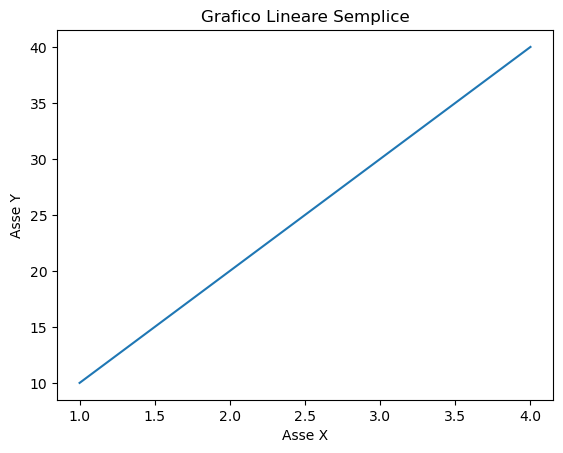

In [1]:
x = [1, 2, 3, 4]
y = [10, 20, 30, 40]

plt.plot(x, y)
plt.xlabel("Asse X")
plt.ylabel("Asse Y")
plt.title("Grafico Lineare Semplice")

## Esempio 2: Grafico con legenda e stile

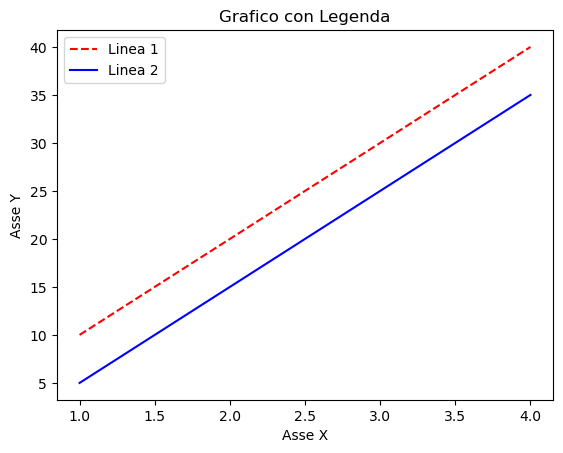

In [3]:
x = [1, 2, 3, 4]
y1 = [10, 20, 30, 40]
y2 = [5, 15, 25, 35]

plt.plot(x, y1, label="Linea 1", color="red", linestyle="--")
plt.plot(x, y2, label="Linea 2", color="blue", linestyle="-")
plt.xlabel("Asse X")
plt.ylabel("Asse Y")
plt.title("Grafico con Legenda")
plt.legend()

## Esempio 3: Istogramma

Text(0.5, 1.0, 'Istogramma')

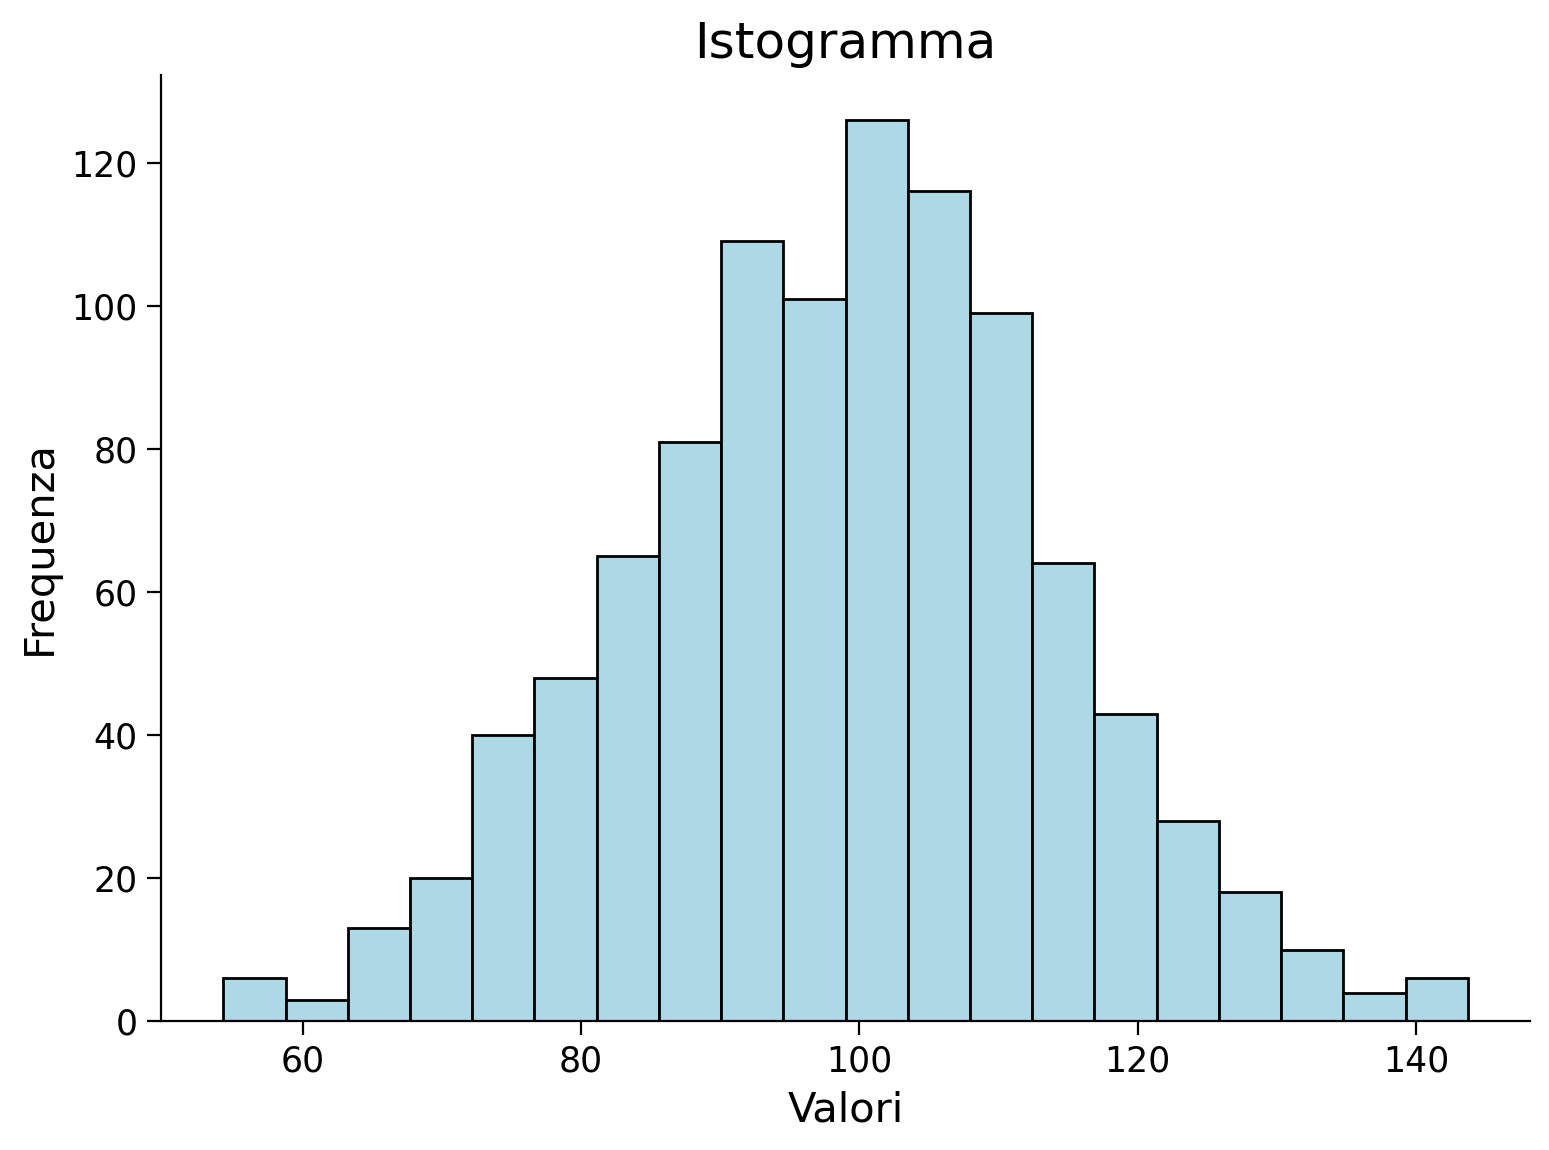

In [24]:
data = rng.normal(100, 15, 1000)

plt.hist(data, bins=20, color="lightblue", edgecolor="black")
plt.xlabel("Valori")
plt.ylabel("Frequenza")
plt.title("Istogramma")

`plt` offre un'interfaccia semplice ma potente per la creazione di una vasta gamma di trame e figure. Puoi personalizzare ulteriormente queste figure utilizzando varie opzioni disponibili nelle funzioni di `plt`, come il colore, lo stile delle linee, i marcatori e molto altro.

## Esempio 4: pannelli multipli

Facciamo un altro esempio usando i dati `penguins.csv`.

In [9]:
df = pd.read_csv("../data/penguins.csv")
df.dropna(inplace=True)

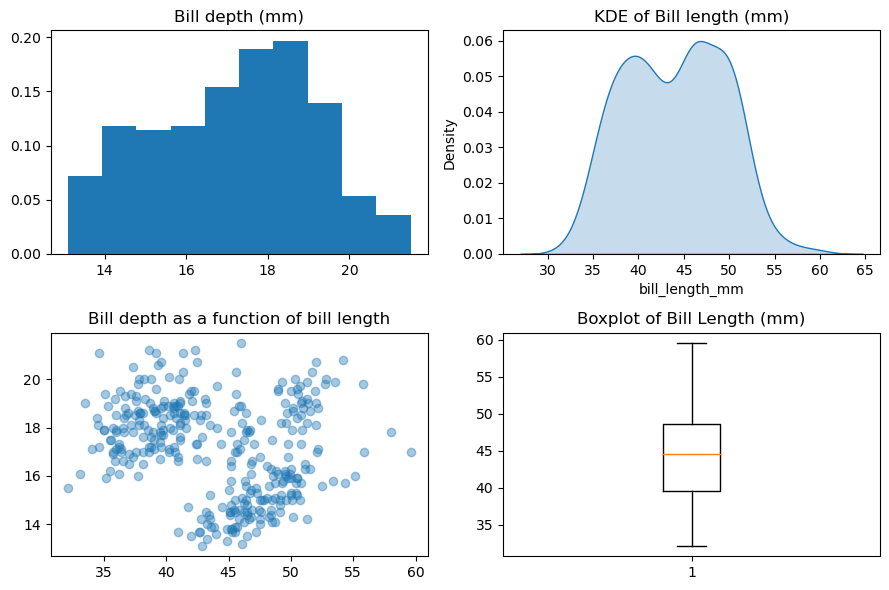

In [15]:
plt.figure(figsize=(9, 6))

plt.subplot(2, 2, 1)
plt.hist(df["bill_depth_mm"], 10, density=True)
plt.title("Bill depth (mm)")

plt.subplot(2, 2, 2)
sns.kdeplot(df["bill_length_mm"], fill=True)
plt.title("KDE of Bill length (mm)")

plt.subplot(2, 2, 3)
plt.scatter(x=df["bill_length_mm"], y=df["bill_depth_mm"], alpha=0.4)
plt.title("Bill depth as a function of bill length")

plt.subplot(2, 2, 4)
plt.boxplot(df["bill_length_mm"])
plt.title("Boxplot of Bill Length (mm)")

plt.tight_layout()

## Watermark

In [6]:
%load_ext watermark
%watermark -n -u -v -iv -w

Last updated: Sun Aug 13 2023

Python implementation: CPython
Python version       : 3.11.4
IPython version      : 8.14.0

pandas    : 2.0.3
numpy     : 1.25.2
matplotlib: 3.7.2

Watermark: 2.4.3

